# Identifying the Ford GoBike Subscriber and Customer behaviour
## by Georgios Pallas

## Investigation Overview

In this presentation the main characteristics for the behaviour of the different Ford GoBike user types will be presented. There are two different types of users: Subscribers and Customers. By identifying their characteristics, on when they use the bikes, for how long, and from which locations, can help us improve the overall product.

## Dataset Overview

The dataset includes more than 2,000,000 records of Ford GoBike trips, in the San Francisco Bay Area, for the years 2017 (from June) and 2018. Among others, the features included in the dataset are: duration of each bike trip, start and end time, station information, as well as the type of user and other information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean_master.csv')
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,member_age,decade,start_day_of_week
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,1987.0,Male,31.0,30s,6
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,1965.0,Female,53.0,50s,6


In [3]:
# quick fixes
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194715 entries, 0 to 2194714
Data columns (total 14 columns):
duration_sec          2194715 non-null int64
start_time            2194715 non-null datetime64[ns]
end_time              2194715 non-null datetime64[ns]
start_station_id      2194715 non-null int64
start_station_name    2194715 non-null object
end_station_id        2194715 non-null int64
end_station_name      2194715 non-null object
bike_id               2194715 non-null int64
user_type             2194715 non-null category
member_birth_year     2194715 non-null float64
member_gender         2194715 non-null object
member_age            2194715 non-null float64
decade                2194715 non-null object
start_day_of_week     2194715 non-null int64
dtypes: category(1), datetime64[ns](2), float64(2), int64(5), object(4)
memory usage: 219.8+ MB


## Number of bike trips by user type

There are two types of Ford GoBike users. Subscribers and Customers. The majority of trips are from the Subscribers. About 2,000,000 trips are from users that are Subscribers, while about 250,000 trips are from users that are Customers.

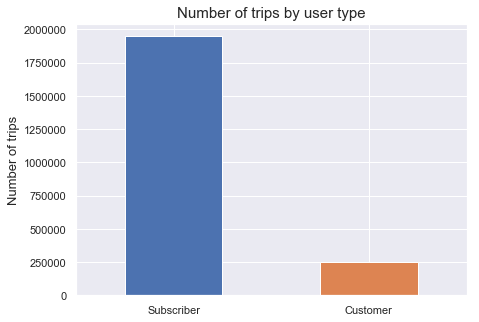

In [4]:
# number of trips by subscribers and customers
plt.figure(figsize = (7,5))
df_clean.user_type.value_counts().plot(kind = 'bar', color = [sb.color_palette()[0], sb.color_palette()[1]])
plt.title('Number of trips by user type', fontdict={'fontsize':15})
plt.xticks(rotation = 0)
plt.ylabel('Number of trips', fontdict={'fontsize':13});

## Average drip duration by user type

The average bike trip duration for Customers is more than double that of Subscribers. Customers spent on average more than 25 minutes on the bikes, while Subscribers spent about 10 minutes on average on the bikes.

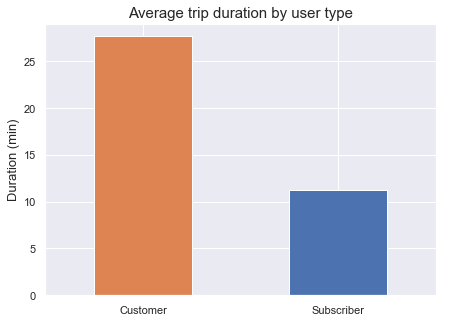

In [5]:
# average trip duration by user type
plt.figure(figsize = (7,5))
(df_clean.groupby('user_type').mean().duration_sec/60).plot(kind = 'bar', color = [sb.color_palette()[1], sb.color_palette()[0]])
plt.title('Average trip duration by user type', fontdict={'fontsize':15})
plt.ylabel('Duration (min)', fontdict={'fontsize':13})
plt.xlabel('')
plt.xticks(rotation = 0);

## Number of trips by week day by user type

Subscribers are mostly using the bikes throughout the week, while Customers are mostly using the bikes on Saturdays, followed by the rest of the week days! That is an indicator that Customers are most likely visitors/tourists at the city, while Subscribers are most likely regular commuters.

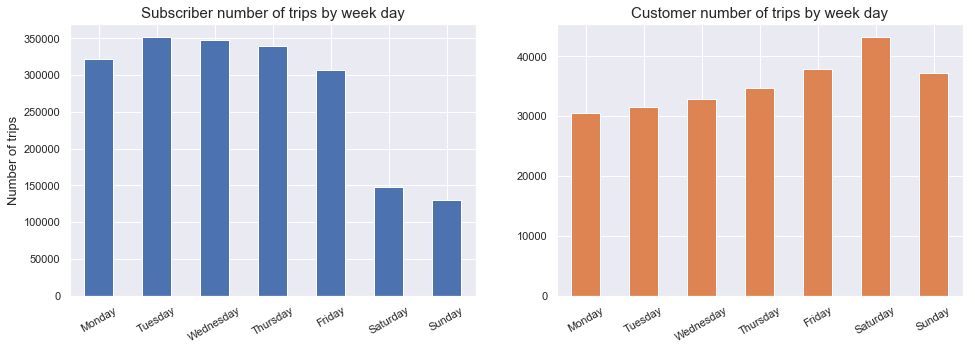

In [6]:
# number of bike trips per week day for subscribers and customers
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
df_clean[df_clean.user_type == 'Subscriber'].groupby(df_clean.start_time.dt.dayofweek).count().duration_sec.plot(kind = 'bar', color = sb.color_palette()[0])
plt.xlabel('')
plt.ylabel('Number of trips', fontdict={'fontsize':13})
plt.title('Subscriber number of trips by week day', fontdict={'fontsize':15})
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation = 30)

plt.subplot(1,2,2)
df_clean[df_clean.user_type == 'Customer'].groupby(df_clean.start_time.dt.dayofweek).count().duration_sec.plot(kind = 'bar', color = sb.color_palette()[1])
plt.xlabel('')
plt.ylabel('')
plt.title('Customer number of trips by week day', fontdict={'fontsize':15})
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation = 30);

## Number of trips by hour of day by user type

Subscribers are mostly using the bikes during the rush hours, while Customers are mostly using the bikes in the evenings and mostly equally during the rest of day. This enhances the previous conclusion that Subscribers are mostly regular commuters and Customers are likely visitors.

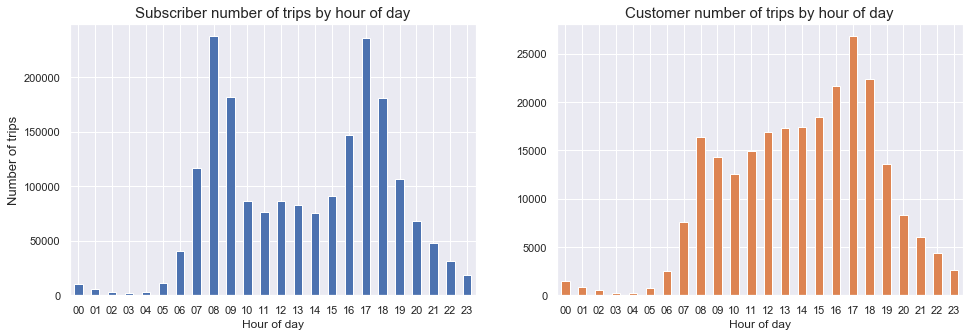

In [7]:
# number of trips per hour for subscribers and customers
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
df_clean[df_clean.user_type == 'Subscriber'].groupby(df_clean.start_time.dt.hour).count().duration_sec.plot(kind = 'bar', color = sb.color_palette()[0])
plt.xlabel('Hour of day')
plt.ylabel('Number of trips', fontdict={'fontsize':13})
plt.title('Subscriber number of trips by hour of day', fontdict={'fontsize':15})
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
plt.xticks(rotation = 0)

plt.subplot(1,2,2)
df_clean[df_clean.user_type == 'Customer'].groupby(df_clean.start_time.dt.hour).count().duration_sec.plot(kind = 'bar', color = sb.color_palette()[1])
plt.xlabel('Hour of day')
plt.ylabel('')
plt.title('Customer number of trips by hour of day', fontdict={'fontsize':15})
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
plt.xticks(rotation = 0);

## Daily number of trips by hour of the day by user type

It is clearly shown in this slide that Subscribers are mostly travelling during the week and rush hours, from 8:00 to 9:00 and from 17:00 to 18:00, most likely commuting to/from work. Customers are mostly travelling on Saturdays, followed by the other days of the week, with an increasing trend from the morning, about 8:00, to the evening hours, about 18:00.

In [8]:
# gather together number of trips per hour and week day for subscribers
df_sub = df_clean[df_clean.user_type == 'Subscriber'].groupby([df_clean.start_time.dt.hour, df_clean.start_day_of_week]).size().reset_index(name = 'count')
df_sub = df_sub.pivot(index = 'start_time', columns = 'start_day_of_week', values = 'count')
# gather together number of trips per hour and week day for customers
df_cus = df_clean[df_clean.user_type == 'Customer'].groupby([df_clean.start_time.dt.hour, df_clean.start_day_of_week]).size().reset_index(name = 'count')
df_cus = df_cus.pivot(index = 'start_time', columns = 'start_day_of_week', values = 'count')

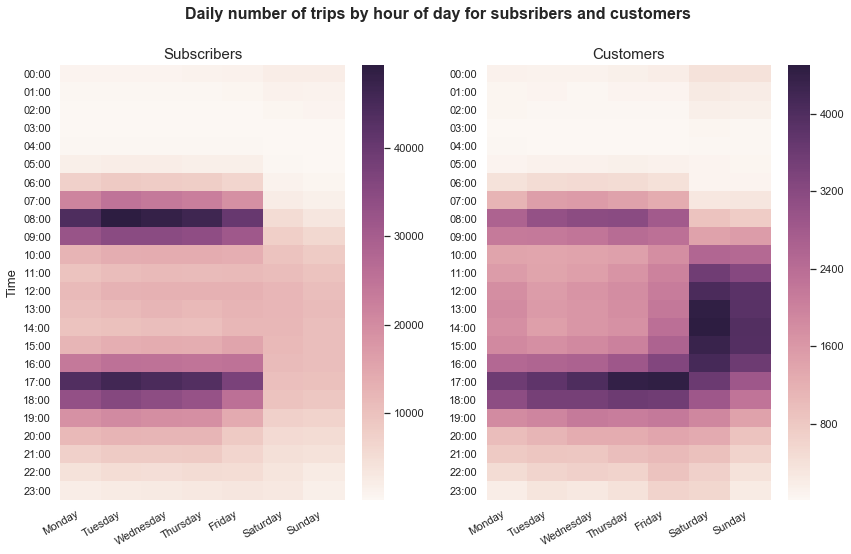

In [9]:
# plot them together using a heatmap
plt.figure(figsize = (14,8))
cmap = sb.cubehelix_palette(as_cmap=True, reverse=False, dark = 0.15, light = 0.97, hue = 0.9)

plt.suptitle('Daily number of trips by hour of day for subsribers and customers', fontsize=16, fontweight = 'bold')

plt.subplot(1,2,1)
sb.heatmap(df_sub, cmap = cmap)

plt.xlabel('')
plt.ylabel('Time', fontdict={'fontsize':13})
plt.title('Subscribers', fontdict={'fontsize':15})

plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5],
           ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'])

plt.xticks(rotation = 30)
plt.yticks(rotation = 0)

plt.subplot(1,2,2)
sb.heatmap(df_cus, cmap = cmap)

plt.xlabel('')
plt.ylabel('')
plt.title('Customers', fontdict={'fontsize':15})

plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5],
           ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'])

plt.xticks(rotation = 30)
plt.yticks(rotation = 0);

## Busiest stations by number of trips by user type

The busiest stations differ between the two bike user types. For Subscribers, for the top 10 busiest stations by number of trips, there is a more "linear" decrease in the "business" of the stations. For customers however, there are two dominant stations by number of trips, and the rest are following!

These two stations are likely popular destinations/starting points for visitors/tourists. For example, we see that one of them is "San Francisco Ferry Building" which is a popular location for the visitors of the city.

In [10]:
df_station = df_clean.groupby(['start_station_name', 'user_type']).size().reset_index(name = 'count')
df_station = df_station.pivot(index = 'start_station_name', columns = 'user_type', values = 'count')

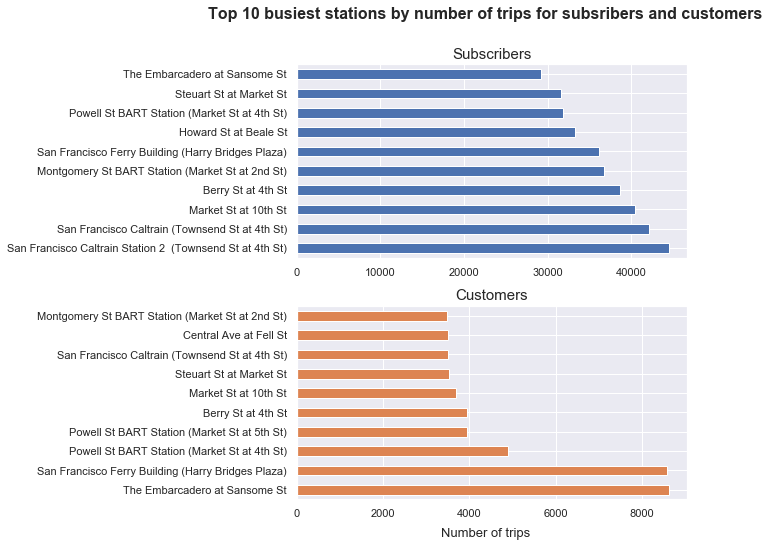

In [11]:
#plt.figure(figsize = (7,8))
fig, ax = plt.subplots(2, 1, figsize=(7, 8))
fig.suptitle('Top 10 busiest stations by number of trips for subsribers and customers', fontsize=16, fontweight = 'bold')
fig.subplots_adjust(hspace=0.25)

#fig.text(-0.48, 0.5, 'Station name', va='center', rotation = 90, fontdict={'fontsize':13, 'fontweight' : 'bold'})
fig.text(0.5, 0.06, 'Number of trips', ha='center', rotation = 0, fontdict={'fontsize':13})

#plt.subplot(2,1,1)
df_station.Subscriber.sort_values(ascending = False).head(10).plot(ax = ax[0], kind = 'barh', color = sb.color_palette()[0])
ax[0].set_title('Subscribers', fontdict={'fontsize':15})
ax[0].set_ylabel('')

#plt.subplot(2,1,2)
df_station.Customer.sort_values(ascending = False).head(10).plot(ax = ax[1], kind = 'barh', color = sb.color_palette()[1])
ax[1].set_title('Customers', fontdict={'fontsize':15})
ax[1].set_ylabel('');

## Conclusions

The two user type groups - Subscribers and Customers - have different behaviour, on when they use the bikes, the average duration of the bike trips, as well as, on the locations that they mostly start their rides.

Subscribers are more regular commuters of the bikes, mostly using them during the rush hours in the week days.

On the other hand, Customers are likely visitors of the city, using the bikes mostly on Saturdays, followed by the rest of the week days. On average, they spend more time per bike trip compared to Subscribers, since they are using the bikes during thir leisure/visiting time.

Finally, the two groups also differ in the locations that they start their bike trips. If indeed, customers are mostly visitors at the city, this information can help us improve the service, e.g. by adding tourist information in the popular stations.

Identifying these population characteristics and how and when the different user types use the bikes, can help us improve the overal product.